In [1]:
# importing libraries for data preprocessing
import pandas as pd

# import libraries for plotting
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#importing libraries for AR model
from statsmodels.tsa.ar_model import AR

# import libraries for error metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
# data preprocessing
# reading dataset
data = pd.read_csv("SMARD_Realisierter_Stromverbrauch_201811170000_202011122345_1.csv")
data = data.drop_duplicates(subset='Date', keep='first')
data.set_index('Date', inplace=True)
data.head()

,Time,Demand[MWh]
Date,,
17.11.2018,00:00,118
18.11.2018,00:00,995
19.11.2018,00:00,985
20.11.2018,00:00,11425
21.11.2018,00:00,1265


In [3]:
# making column datetime
data.index = pd.to_datetime(data.index)

# removing unwanted data and sorting
data = data['Demand[MWh]']
data.columns = ['Energy Production']
data = data.sort_index()

print(len(data))
data = data['2019-01-01 00:00':'2019-06-01 00:00,']
data.tail()

365


Date
2019-05-28    12925
2019-05-29    12625
2019-05-30     1245
2019-05-31      110
2019-06-01    15525
Name: Demand[MWh], dtype: int64

In [4]:
# chainging column name
data.columns = ['Energy Production']
data.head()

Date
2019-01-01    13225
2019-01-02        0
2019-01-03    10725
2019-01-04     1005
2019-01-05    12125
Name: Demand[MWh], dtype: int64

In [5]:
#plotting the data 
data.iplot(title="power")

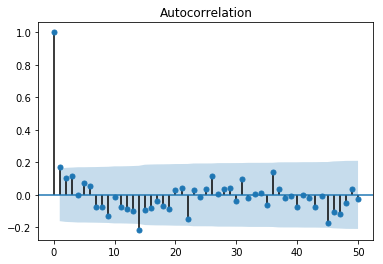

In [6]:
# plotting auto correllation function values
plot_acf(data, lags=50)
pyplot.show()

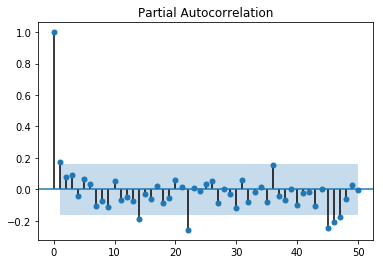

In [7]:
# plotting partial auto correlation function values
plot_pacf(data, lags=50)
pyplot.show()

In [8]:
# shiffiting data by 12 has high correlation
# data['Energy Production'].corr(data['Energy Production'].shift(12))
data.corr(data.shift(12))

-0.09105208406993333

In [9]:
dt = data.copy(deep=True)
# dt['Energy Production'] = data['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()

In [10]:
dt.head()

Date
2019-01-01    13225
2019-01-02        0
2019-01-03    10725
2019-01-04     1005
2019-01-05    12125
Name: Demand[MWh], dtype: int64

In [11]:
# dt = dt.iloc[4:]
# dt.head()

In [12]:
 
#create train/test datasets
X = dt.dropna()
train_data = X[:int((len(X)*70)/100)]
test_data = X[int((len(X)*70)/100):]
 
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [13]:
# printing the parameters
print('The lag value chose is: %s' % model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 12
The coefficients of the model are:
 const              5392.727266
L1.Demand[MWh]        0.142313
L2.Demand[MWh]        0.007908
L3.Demand[MWh]        0.094753
L4.Demand[MWh]       -0.160361
L5.Demand[MWh]        0.124990
L6.Demand[MWh]        0.124383
L7.Demand[MWh]        0.015342
L8.Demand[MWh]       -0.125780
L9.Demand[MWh]       -0.088571
L10.Demand[MWh]       0.067326
L11.Demand[MWh]      -0.075431
L12.Demand[MWh]      -0.121025
dtype: float64


In [14]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
 

#plot the two values
future_forecast = predictions
future_forecast = pd.DataFrame(future_forecast,index = X[int((len(X)*70)/100):].index,columns=['Prediction'])
pd.concat([X[int((len(X)*70)/100):],future_forecast],axis=1).iplot(title="Prediction",xTitle='TIme Stamp',yTitle='Demand')

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [15]:
print(future_forecast)
future_forecast.iplot()

            Prediction
Date                  
2019-04-17         NaN
2019-04-18         NaN
2019-04-19         NaN
2019-04-20         NaN
2019-04-21         NaN
2019-04-22         NaN
2019-04-23         NaN
2019-04-24         NaN
2019-04-25         NaN
2019-04-26         NaN
2019-04-27         NaN
2019-04-28         NaN
2019-04-29         NaN
2019-04-30         NaN
2019-05-01         NaN
2019-05-02         NaN
2019-05-03         NaN
2019-05-04         NaN
2019-05-05         NaN
2019-05-06         NaN
2019-05-07         NaN
2019-05-08         NaN
2019-05-09         NaN
2019-05-10         NaN
2019-05-11         NaN
2019-05-13         NaN
2019-05-14         NaN
2019-05-15         NaN
2019-05-16         NaN
2019-05-17         NaN
2019-05-18         NaN
2019-05-19         NaN
2019-05-20         NaN
2019-05-21         NaN
2019-05-22         NaN
2019-05-23         NaN
2019-05-24         NaN
2019-05-25         NaN
2019-05-26         NaN
2019-05-27         NaN
2019-05-28         NaN
2019-05-29 

In [16]:
# plotting whole dataset with predictions
pd.concat([X,future_forecast],axis=1).iplot()

In [17]:
#  printing r2 score of our model 
r2 = r2_score(X[int((len(X)*70)/100):], predictions)
r2

-0.0020461651198340203

In [18]:
#  printing mean square error of our model 
rms = sqrt(mean_squared_error(X[int((len(X)*70)/100):], predictions))
print(rms)

5870.885108936713
